<a href="https://colab.research.google.com/github/1012357482/ConsumoAguaSeriesTemporales/blob/developer/ConsumoAguaSeriesTemporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Proyecto predicción del consumo del agua**

</center>


<center>
  <img src="https://colombiaestudia.com/wp-content/uploads/2021/12/1154.png" width="300" height="300">
</center>


<center>

#Escuela Tecnólogica Instituto Técnico Central

##*Facultad Ingenieria de Sistemas**

###*Electiva Técnica IV, Ciencia de datos*

### Profesor: Elías Buitrago

### Alumnos: Ferrixon Matiz, Camilo Reyes.
</center>

**Índice**   
0. [Obtención de los datos](#id0) <br>
1. [Preprocesado de los datos](#id1) <br>
  1.1.[Selección de los datos](#id11) <br>
  1.2.[Análisis exploratorio de datos](#id12)<br>
  1.3.[Limpieza de datos](#id13)<br>
  1.4.[Manejo de datos faltantes](#id14)<br>
2. [Análisis exploratorio de los datos(EDA).](#id2)<br>
3. [Modelos y algoritmos (ARIMA)](#id3)
4. [Interpretación del Error cuadrático medio (RMSE)](#id4)
5. [Conclusiones](#id5)
6. [Hasta aquí llegamos](#id6)

#0. Obtención de los datos <a name="id0">

Para trabajar sobre la predicción del consumo de agua residencial en la ciudad de Bogotá se vio la necesidad de obtener un dataset oconjutno de datos que fuese fiable en cuanto a la validez de su data además de la fiabilidad de su procedencia.</br>
En la busqueda de la data fue posible obtener el siguiente dataset perteneciente a la superintendencia de servició públicos domiciliarios.

* Este conjunto de datos resume el consumo historico de agua en metros cúbicos entre los años 2014 y 2021 en varias zonas residenciales de Colombia.

[Consumo de Agua 2014-2021](https://www.superservicios.gov.co/sites/default/files/inline-files/Consumos-Historicos-de-Agua-Potable-2014-2021.xlsx).

* Para los años del 2005 al 2014 se encontro el siguiente registro en un documentod digital en la pagina de la comisión de regulación de agua potable y saneamiento básico (CRA)

[Consumo de Agua 2005-2014](https://www.cra.gov.co/sites/default/files/marco-legal/2017-11/Documento_de_Trabajo_y_Participacion_Ciudadana_750.pdf).


* Sera propósito del proyecto determinar el consumo de agua para el año 2022 Por suscriptor, puede ser general o tambien se puede discriminar pos estrato. Esto haciendo uso de las series temporales.

* El análisis de series temporales es fundamental en la toma de decisiones en campos como la economía, la gestión de inventarios, la meteorología y la planificación empresarial, ya que ayuda a comprender y anticipar patrones y cambios a lo largo del tiempo.

* Los datos se encuentran en la página 39 del documento.

#1. Preprocesado <a name="id1">

Para entender realmente el conjunto de datos, se estudiará el significado y la relevancia de cada variable con respecto al problema. Se buscará responder a diversas cuestiones sobre ellas, como:

*  Entendimiento de los datos.
*  La relevancia de las variables.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Selección de los datos. <a name="id11">

In [ ]:
dataset_general_0=pd.read_csv('/content/drive/MyDrive/Consumos-Historicos-de-Agua-Potable-2005-2014.csv', sep=';')
dataset_general=pd.read_csv('/content/drive/MyDrive/Consumos-Historicos-de-Agua-Potable-2014-2021.csv', sep=';')

In [ ]:
dataset_general_0.head()

,EMPRESA,AÑO,1P,2P,3P,4P,5P,6P,PROMEDIO
0,CRA,2005,11.69,12.59,11.94,12.19,14.47,16.62,12.51
1,CRA,2006,11.49,12.02,11.65,12.04,14.62,16.70,12.16
2,CRA,2007,11.59,11.97,11.48,11.90,14.39,16.49,12.05
3,CRA,2008,11.89,11.56,11.08,11.45,13.68,15.93,11.67
4,CRA,2009,11.81,11.24,10.66,10.89,12.82,14.96,11.25


In [ ]:
dataset_general.head()

,IDENTIFICADOR EMPRESA,EMPRESA,AÑO,CÓDIGO DANE,DEPARTAMENTO,MUNICIPIO,1T,2T,3T,4T,5T,6T,1P,2P,3P,4P,5P,6P
0,980,MUNICIPIO DE PUERTO NARIÑO,2014,91540,AMAZONAS,PUERTO NARINO,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,OFICINA DE SERVICIOS PÚBLICOS DE MONTEBELLO,2014,5467,ANTIOQUIA,MONTEBELLO,9.377,21.342,28.045,NaN,NaN,NaN,"10,75","9,52","9,32",NaN,NaN,NaN
2,77,EMPRESAS PUBLICAS MUNICIPALES DE PUERTO NARE E...,2014,5585,ANTIOQUIA,PUERTO NARE,227.554,393.354,59.762,NaN,NaN,NaN,"15,17","15,93","14,80",NaN,NaN,NaN
3,91,EMPRESA DE SERVICIOS PUBLICOS LA UNION S.A E.S.P.,2014,5400,ANTIOQUIA,LA UNION,41.721,314.515,111.779,4.155,NaN,NaN,"13,56","11,15","11,37","28,85",NaN,NaN
4,96,EMPRESA DE SERVICIOS PÚBLICOS DE EL CARMEN DE ...,2014,5148,ANTIOQUIA,EL CARMEN DE VIBORAL,13.849,369.051,608.558,1.417,NaN,NaN,"12,91","10,96","9,76","4,70",NaN,NaN


## 1.2 Análisis exploratorio de datos. <a name="id12">

In [ ]:
dataset_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   IDENTIFICADOR EMPRESA  6942 non-null   int64 
 1   EMPRESA                6942 non-null   object
 2   AÑO                    6942 non-null   int64 
 3   CÓDIGO DANE            6942 non-null   int64 
 4   DEPARTAMENTO           6942 non-null   object
 5   MUNICIPIO              6942 non-null   object
 6   1T                     6803 non-null   object
 7   2T                     6532 non-null   object
 8   3T                     5699 non-null   object
 9   4T                     3221 non-null   object
 10  5T                     1501 non-null   object
 11  6T                     1023 non-null   object
 12  1P                     5413 non-null   object
 13  2P                     6015 non-null   object
 14  3P                     5322 non-null   object
 15  4P                   

## 1.3 Limpieza de datos.<a name="id13"></br>
## Se realizara sobre el dataset general que comprende los años 2014 al 2021.
 Se filtra el dataset para la ciudad  de Bógota D.C.

In [ ]:
dataset_general['MUNICIPIO'].unique()

array(['PUERTO NARINO', 'MONTEBELLO', 'PUERTO NARE', 'LA UNION',
       'EL CARMEN DE VIBORAL', 'MEDELLIN', 'BARBOSA', 'BELLO', 'CALDAS',
       'COPACABANA', 'ENVIGADO', 'GIRARDOTA', 'ITAGUI', 'LA ESTRELLA',
       'SABANETA', 'CAMPAMENTO', 'URRAO', 'ANZA', 'GUARNE', 'FRONTINO',
       'PENOL', 'ALEJANDRIA', 'BELMIRA', 'GUATAPE', 'ABEJORRAL',
       'SAN VICENTE', 'CONCEPCION', 'CONCORDIA', 'LA CEJA', 'NECOCLI',
       'SAN PEDRO DE URABA', 'AMALFI', 'ANORI', 'ARBOLETES', 'ARMENIA',
       'PUERTO TRIUNFO', 'SAN JOSE DE LA MONTANA', 'SAN PEDRO',
       'SANTA ROSA DE OSOS', 'TITIRIBI', 'VENECIA', 'ANDES',
       'CIUDAD BOLIVAR', 'JARDIN', 'SEGOVIA', 'RIONEGRO', 'CAROLINA',
       'PUERTO BERRIO', 'FREDONIA', 'SANTA BARBARA', 'ZARAGOZA',
       'EL SANTUARIO', 'YOLOMBO', 'GOMEZ PLATA', 'MARINILLA', 'GRANADA',
       'COCORNA', 'CAICEDO', 'YONDO', 'RETIRO', 'TOLEDO', 'SANTO DOMINGO',
       'ENTRERRIOS', 'OLAYA', 'NARINO', 'SALGAR', 'ANGELOPOLIS',
       'SAN CARLOS', 'EBEJICO', 'CACER

In [ ]:
in_bogota= dataset_general['MUNICIPIO'] == "BOGOTA, D.C."
dataset_bogota_2014_2021=dataset_general[in_bogota]
dataset_bogota_2014_2021.info()
dataset_bogota_2014_2021


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   IDENTIFICADOR EMPRESA  16 non-null     int64 
 1   EMPRESA                16 non-null     object
 2   AÑO                    16 non-null     int64 
 3   CÓDIGO DANE            16 non-null     int64 
 4   DEPARTAMENTO           16 non-null     object
 5   MUNICIPIO              16 non-null     object
 6   1T                     13 non-null     object
 7   2T                     13 non-null     object
 8   3T                     14 non-null     object
 9   4T                     14 non-null     object
 10  5T                     14 non-null     object
 11  6T                     14 non-null     object
 12  1P                     11 non-null     object
 13  2P                     12 non-null     object
 14  3P                     12 non-null     object
 15  4P                   

,IDENTIFICADOR EMPRESA,EMPRESA,AÑO,CÓDIGO DANE,DEPARTAMENTO,MUNICIPIO,1T,2T,3T,4T,5T,6T,1P,2P,3P,4P,5P,6P
143,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.103.158,72.106.197,69.500.747,30.159.467,11.087.023,10.703.104,"23,72","21,53","19,33","19,19","21,87","26,01"
1016,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.294.156,72.872.505,69.476.632,30.000.490,11.116.290,10.538.900,"23,58","21,37","19,00","18,70","21,00","25,15"
1891,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,11001,"BOGOTA, D.C.","BOGOTA, D.C.",14.376.680,70.093.859,65.173.133,28.571.218,10.206.408,9.576.765,"21,93","20,25","17,83","17,53","19,46","23,53"
2149,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,25004,CUNDINAMARCA,"BOGOTA, D.C.",308,1.706,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2771,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,11001,"BOGOTA, D.C.","BOGOTA, D.C.",20.181.940,97.882.542,94.689.530,38.648.802,14.349.529,13.761.187,"21,59","20,77","18,39","17,83","19,52","22,98"
3601,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.723.513,79.567.237,76.058.201,30.983.396,11.285.651,10.503.659,"21,99","21,10","18,29","17,66","19,47","22,87"
4330,70,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",16.654.516,79.416.240,75.798.664,31.699.349,11.524.868,10.557.076,"10,83","10,59","9,10","8,76","9,62","11,20"
4331,1922,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",895,281.130,3.455,1.209,12.534,2.077,"12,43","10,31","14,40","11,19","11,61","10,82"
4332,22636,COJARDIN SA ESP,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",NaN,NaN,NaN,56.784,15.459,250.025,NaN,NaN,NaN,"31,04","8,46","8,75"
5116,70,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,11001,"BOGOTA, D.C.","BOGOTA, D.C.",17.139.759,81.614.514,78.006.097,32.782.875,11.915.894,11.031.496,"10,94","10,69","8,92","8,57",NaN,"9,92"


### Se eliminan columnas que se consideran innecesarias.

In [ ]:
dataini = dataset_bogota_2014_2021
# axis=1 --> elimina columnas
dataini = dataini.drop(['IDENTIFICADOR EMPRESA','CÓDIGO DANE','DEPARTAMENTO','MUNICIPIO','1T','2T','3T','4T','5T','6T' ], axis=1)
dataset_bogota_2014_2021=dataini
dataset_bogota_2014_2021

,EMPRESA,AÑO,1P,2P,3P,4P,5P,6P
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,"23,72","21,53","19,33","19,19","21,87","26,01"
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,"23,58","21,37","19,00","18,70","21,00","25,15"
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,"21,93","20,25","17,83","17,53","19,46","23,53"
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,NaN,NaN,NaN,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,"21,59","20,77","18,39","17,83","19,52","22,98"
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,"21,99","21,10","18,29","17,66","19,47","22,87"
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,"10,83","10,59","9,10","8,76","9,62","11,20"
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,"12,43","10,31","14,40","11,19","11,61","10,82"
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,"31,04","8,46","8,75"
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,"10,94","10,69","8,92","8,57",NaN,"9,92"


In [ ]:
dataset_bogota_2014_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EMPRESA  16 non-null     object
 1   AÑO      16 non-null     int64 
 2   1P       11 non-null     object
 3   2P       12 non-null     object
 4   3P       12 non-null     object
 5   4P       14 non-null     object
 6   5P       11 non-null     object
 7   6P       14 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


## 1.4 Verificamos datos faltantes <a name="id14">

In [ ]:
dataset_bogota_2014_2021.isnull()

,EMPRESA,AÑO,1P,2P,3P,4P,5P,6P
143,False,False,False,False,False,False,False,False
1016,False,False,False,False,False,False,False,False
1891,False,False,False,False,False,False,False,False
2149,False,False,True,True,True,True,True,True
2771,False,False,False,False,False,False,False,False
3601,False,False,False,False,False,False,False,False
4330,False,False,False,False,False,False,False,False
4331,False,False,False,False,False,False,False,False
4332,False,False,True,True,True,False,False,False
5116,False,False,False,False,False,False,True,False


In [ ]:
dataframe_bogota_2014_2021= pd.DataFrame(dataset_bogota_2014_2021)


## Se cuentan los datos faltantes por columna.

In [ ]:
dataframe_bogota_2014_2021.isnull().sum(min_count=1)
#dataframe_bogota.isnull().sum().sum()

EMPRESA    0
AÑO        0
1P         5
2P         4
3P         4
4P         2
5P         5
6P         2
dtype: int64

In [ ]:
dataframe_bogota_2014_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EMPRESA  16 non-null     object
 1   AÑO      16 non-null     int64 
 2   1P       11 non-null     object
 3   2P       12 non-null     object
 4   3P       12 non-null     object
 5   4P       14 non-null     object
 6   5P       11 non-null     object
 7   6P       14 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


### Se conviertes los datos a tipo númerico


In [ ]:
def transformar_valor(valor):
    if pd.notna(valor):
        valor = valor.replace('.', '').replace(',', '.')
    return valor

In [ ]:
#Se modifica "." por la "," para una conversión ideal a datos númericos
#Sin esto al aplicar el cambio de formato convierte los valores tipo 000.000.000.
#Es decir conva mas de un punto decimal, los deja como NaN

dataframe_bogota_2014_2021['1P'] = dataframe_bogota_2014_2021['1P'].apply(transformar_valor)
dataframe_bogota_2014_2021['2P'] = dataframe_bogota_2014_2021['2P'].apply(transformar_valor)
dataframe_bogota_2014_2021['3P'] = dataframe_bogota_2014_2021['3P'].apply(transformar_valor)
dataframe_bogota_2014_2021['4P'] = dataframe_bogota_2014_2021['4P'].apply(transformar_valor)
dataframe_bogota_2014_2021['5P'] = dataframe_bogota_2014_2021['5P'].apply(transformar_valor)
dataframe_bogota_2014_2021['6P'] = dataframe_bogota_2014_2021['6P'].apply(transformar_valor)


dataframe_bogota_2014_2021['1P'] = pd.to_numeric(dataframe_bogota_2014_2021['1P'], errors="coerce")
dataframe_bogota_2014_2021['2P'] = pd.to_numeric(dataframe_bogota_2014_2021['2P'], errors="coerce")
dataframe_bogota_2014_2021['3P'] = pd.to_numeric(dataframe_bogota_2014_2021['3P'], errors="coerce")
dataframe_bogota_2014_2021['4P'] = pd.to_numeric(dataframe_bogota_2014_2021['4P'], errors="coerce")
dataframe_bogota_2014_2021['5P'] = pd.to_numeric(dataframe_bogota_2014_2021['5P'], errors="coerce")
dataframe_bogota_2014_2021['6P'] = pd.to_numeric(dataframe_bogota_2014_2021['6P'], errors="coerce")

dataframe_bogota_2014_2021.info()
dataset_general_0.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EMPRESA  16 non-null     object 
 1   AÑO      16 non-null     int64  
 2   1P       11 non-null     float64
 3   2P       12 non-null     float64
 4   3P       12 non-null     float64
 5   4P       14 non-null     float64
 6   5P       11 non-null     float64
 7   6P       14 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EMPRESA   10 non-null     object 
 1   AÑO       10 non-null     int64  
 2   1P        10 non-null     float64
 3   2P        10 non-null     float64
 4   3P        10 non-null     float64
 5   4P        10 non-null     float64
 6   5P        10 non-null     float64


In [ ]:
dataframe_bogota_2014_2021

,EMPRESA,AÑO,1P,2P,3P,4P,5P,6P
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,23.72,21.53,19.33,19.19,21.87,26.01
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,23.58,21.37,19.00,18.70,21.00,25.15
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,21.93,20.25,17.83,17.53,19.46,23.53
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,NaN,NaN,NaN,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,21.59,20.77,18.39,17.83,19.52,22.98
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,21.99,21.10,18.29,17.66,19.47,22.87
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,10.83,10.59,9.10,8.76,9.62,11.20
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,12.43,10.31,14.40,11.19,11.61,10.82
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,31.04,8.46,8.75
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,10.94,10.69,8.92,8.57,NaN,9.92


## Se unifican los dataset el primero que val del año 2005-2014 y el segundo que va del año 2014 al 2021.



In [ ]:

dataframe_bogota_2005_2021 = pd.concat([dataframe_bogota_2014_2021, dataset_general_0], axis=0, ignore_index=True)
dataframe_bogota_2005_2021 = dataframe_bogota_2005_2021.sort_values(by='AÑO', ascending=True)
dataframe_bogota_2005_2021 = dataframe_bogota_2005_2021.drop('PROMEDIO', axis=1)
dataframe_bogota_2005_2021

,EMPRESA,AÑO,1P,2P,3P,4P,5P,6P
16,CRA,2005,11.69,12.59,11.94,12.19,14.47,16.62
17,CRA,2006,11.49,12.02,11.65,12.04,14.62,16.70
18,CRA,2007,11.59,11.97,11.48,11.90,14.39,16.49
19,CRA,2008,11.89,11.56,11.08,11.45,13.68,15.93
20,CRA,2009,11.81,11.24,10.66,10.89,12.82,14.96
21,CRA,2010,11.24,10.66,10.19,10.09,11.68,13.81
22,CRA,2011,11.28,10.65,10.04,10.09,11.85,15.78
23,CRA,2012,11.51,10.67,9.98,9.92,11.71,13.63
24,CRA,2013,12.59,10.90,9.95,9.95,11.41,13.55
0,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,23.72,21.53,19.33,19.19,21.87,26.01


## Se realiza la imputación de parametros utilizando el valor de la media por cada columna

In [ ]:
from sklearn.impute import SimpleImputer
X=dataframe_bogota_2005_2021.iloc[:,:].values
imp= SimpleImputer(missing_values=np.nan, strategy='mean')
imp= imp.fit(X[:,2:8])
X[:,2:8]=imp.transform(X[:,2:8])
X

array([['CRA', 2005, 11.69, 12.59, 11.94, 12.19, 14.47, 16.62],
       ['CRA', 2006, 11.49, 12.02, 11.65, 12.04, 14.62, 16.7],
       ['CRA', 2007, 11.59, 11.97, 11.48, 11.9, 14.39, 16.49],
       ['CRA', 2008, 11.89, 11.56, 11.08, 11.45, 13.68, 15.93],
       ['CRA', 2009, 11.81, 11.24, 10.66, 10.89, 12.82, 14.96],
       ['CRA', 2010, 11.24, 10.66, 10.19, 10.09, 11.68, 13.81],
       ['CRA', 2011, 11.28, 10.65, 10.04, 10.09, 11.85, 15.78],
       ['CRA', 2012, 11.51, 10.67, 9.98, 9.92, 11.71, 13.63],
       ['CRA', 2013, 12.59, 10.9, 9.95, 9.95, 11.41, 13.55],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2014, 23.72, 21.53, 19.33, 19.19, 21.87, 26.01],
       ['CRA', 2014, 12.05, 10.77, 9.77, 9.59, 10.93, 13.0],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2015, 23.58, 21.37, 19.0, 18.7, 21.0, 25.15],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2016, 14.259523809523811, 13.182727272

## Se estructura nuevamente dentro de un dataframe.

In [ ]:
df_bogota = pd.DataFrame(X,
                       columns=['Empresa', 'Año', '1P', '2P','3P','4P','5P','6P']
                         )
df_bogota

,Empresa,Año,1P,2P,3P,4P,5P,6P
0,CRA,2005,11.69,12.59,11.94,12.19,14.47,16.62
1,CRA,2006,11.49,12.02,11.65,12.04,14.62,16.7
2,CRA,2007,11.59,11.97,11.48,11.9,14.39,16.49
3,CRA,2008,11.89,11.56,11.08,11.45,13.68,15.93
4,CRA,2009,11.81,11.24,10.66,10.89,12.82,14.96
5,CRA,2010,11.24,10.66,10.19,10.09,11.68,13.81
6,CRA,2011,11.28,10.65,10.04,10.09,11.85,15.78
7,CRA,2012,11.51,10.67,9.98,9.92,11.71,13.63
8,CRA,2013,12.59,10.9,9.95,9.95,11.41,13.55
9,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,23.72,21.53,19.33,19.19,21.87,26.01


## En este paso se elimina las columna de empresa , para posteriormente agrupar por años el valor medio del consumo total de agua.

In [ ]:
df_bogota= df_bogota.drop(['Empresa'], axis=1)
print(df_bogota)



     Año         1P         2P         3P        4P         5P         6P
0   2005      11.69      12.59      11.94     12.19      14.47      16.62
1   2006      11.49      12.02      11.65     12.04      14.62       16.7
2   2007      11.59      11.97      11.48      11.9      14.39      16.49
3   2008      11.89      11.56      11.08     11.45      13.68      15.93
4   2009      11.81      11.24      10.66     10.89      12.82      14.96
5   2010      11.24      10.66      10.19     10.09      11.68      13.81
6   2011      11.28      10.65      10.04     10.09      11.85      15.78
7   2012      11.51      10.67       9.98      9.92      11.71      13.63
8   2013      12.59       10.9       9.95      9.95      11.41      13.55
9   2014      23.72      21.53      19.33     19.19      21.87      26.01
10  2014      12.05      10.77       9.77      9.59      10.93       13.0
11  2015      23.58      21.37       19.0      18.7       21.0      25.15
12  2016  14.259524  13.182727  15.424

In [ ]:
df_bogota

,Año,1P,2P,3P,4P,5P,6P
0,2005,11.69,12.59,11.94,12.19,14.47,16.62
1,2006,11.49,12.02,11.65,12.04,14.62,16.7
2,2007,11.59,11.97,11.48,11.9,14.39,16.49
3,2008,11.89,11.56,11.08,11.45,13.68,15.93
4,2009,11.81,11.24,10.66,10.89,12.82,14.96
5,2010,11.24,10.66,10.19,10.09,11.68,13.81
6,2011,11.28,10.65,10.04,10.09,11.85,15.78
7,2012,11.51,10.67,9.98,9.92,11.71,13.63
8,2013,12.59,10.9,9.95,9.95,11.41,13.55
9,2014,23.72,21.53,19.33,19.19,21.87,26.01


In [ ]:
# Configurar el formato de visualización para evitar la notación científica
pd.options.display.float_format = '{:.2f}'.format
# Calcular el valor promedio por año
df_bogota = df_bogota.groupby('Año').agg('mean').reset_index()

df_bogota.info()
df_bogota


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Año     17 non-null     int64  
 1   1P      17 non-null     float64
 2   2P      17 non-null     float64
 3   3P      17 non-null     float64
 4   4P      17 non-null     float64
 5   5P      17 non-null     float64
 6   6P      17 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.1 KB


,Año,1P,2P,3P,4P,5P,6P
0,2005,11.69,12.59,11.94,12.19,14.47,16.62
1,2006,11.49,12.02,11.65,12.04,14.62,16.70
2,2007,11.59,11.97,11.48,11.90,14.39,16.49
3,2008,11.89,11.56,11.08,11.45,13.68,15.93
4,2009,11.81,11.24,10.66,10.89,12.82,14.96
5,2010,11.24,10.66,10.19,10.09,11.68,13.81
6,2011,11.28,10.65,10.04,10.09,11.85,15.78
7,2012,11.51,10.67,9.98,9.92,11.71,13.63
8,2013,12.59,10.90,9.95,9.95,11.41,13.55
9,2014,17.88,16.15,14.55,14.39,16.40,19.51


### Se calcula el consumo en promedio de cado año, la unidad de mediad de consumo de agua es el metro cúbico.(Modifica el ESTRATO)

In [ ]:
# Ignorar la columna 'Columna_a_ignorar' para calcular el promedio

#-1 columnas_a_promediar = df_bogota.drop(columns=['Año'])

# Calcular el promedio por fila en las columnas restantes
#-2 promedios = columnas_a_promediar.mean(axis=1)

# Agregar la columna 'Columna_a_ignorar' al DataFrame de promedios
#-3 df_result = pd.concat([df_bogota['Año'], promedios], axis=1)
#-4 df_result.columns = ['Año', 'Promedio']

df_result=df_bogota[['Año','6P']]

# Imprimir el DataFrame resultante
print(df_result)

df_result=df_result.set_index('Año')
df_result
df_result.info()


     Año    6P
0   2005 16.62
1   2006 16.70
2   2007 16.49
3   2008 15.93
4   2009 14.96
5   2010 13.81
6   2011 15.78
7   2012 13.63
8   2013 13.55
9   2014 19.51
10  2015 25.15
11  2016 19.93
12  2017 22.98
13  2018 22.87
14  2019 10.26
15  2020 14.71
16  2021 15.54
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2005 to 2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6P      17 non-null     float64
dtypes: float64(1)
memory usage: 272.0 bytes


## 2. Análisis exploratorio de los datos <a name="id2">

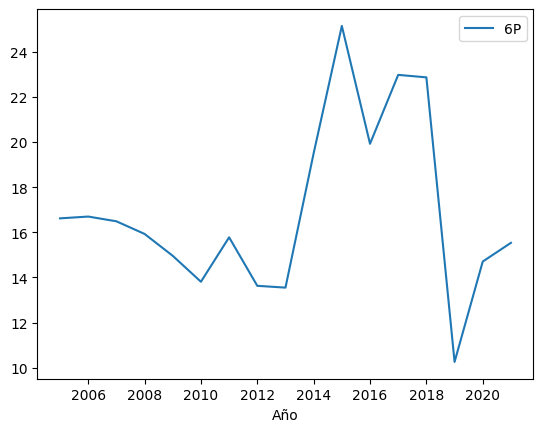

In [ ]:
df_result.plot()
plt.show()


Acá se observan las fluctuciones del consumo de agua en los años transcurridos se puede observar como en el 2020 debido a la pandemia el consumo de agua bajo y como nuevamente aumento en el 2021.

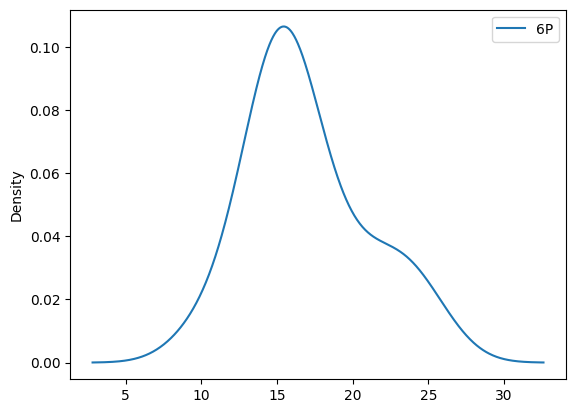

In [ ]:

df_result.plot(kind='kde')
plt.show()



*   En el grafíco de densidad se puede observar los lugares en donde más se acumula los datos correspondientes al consumo del agua.
*  Se observa que en el gráfico de la curva la distribución es no gaussina, evidencia de este hecho la punta achatada, esto sugiere que los datos son más dispersos y que hay una mayor variabilidad en comparación con una distribución normal estándar.



## 3 Modelos y algoritmos (ARIMA) <a name="id3">

El modelo ARIMA se puede entender como una "máquina del tiempo" para predecir el futuro. Piensa en una serie de datos a lo largo del tiempo, como el consumo del agua en una escala de tiempo(días, mese, años). El modelo ARIMA mira cómo esos datos se comportaron en el pasado y usa esa información para hacer una conjetura educada sobre lo que sucederá en el futuro. </br>

**ARIMA** significa AutoRegresive Integrated Moving Average, y básicamente descompone los datos en tres partes:

* ***Auto-Regresivo (AR)***: Se fija en cómo los valores pasados afectan a los valores futuros. Si el consumo de agua fue alto en el pasado, es probable que sean alto en el presente.

* ***Media Móvil (MA)***: Examina los errores o las diferencias entre los valores pasados y los valores reales. Ayuda a corregir cualquier tendencia o patrón.

* ***Diferenciación Integrada (I)***: Asegura que los datos sean estacionarios, lo que significa que no tengan tendencias claras. Si hay una tendencia ascendente, ARIMA la eliminará para hacer predicciones más precisas.

Entonces, el modelo **ARIMA** mira el pasado, ajusta los datos y hace una suposición informada sobre el futuro. Es como usar una máquina del tiempo basada en matemáticas para prever lo que sucederá con el consumo de agua en un tiempo futuro.

In [ ]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i - 1]
    diff.append(value)
  return Series(diff)



In [ ]:
X = df_result.values
X = X.astype('float64')
X=np.squeeze(X)
X

array([16.62      , 16.7       , 16.49      , 15.93      , 14.96      ,
       13.81      , 15.78      , 13.63      , 13.55      , 19.505     ,
       25.15      , 19.92583333, 22.98      , 22.87      , 10.25666667,
       14.70666667, 15.53541667])

In [ ]:
stationary = difference(X)
stationary.index = df_result.index[1:]
#stationary.astype(float)
stationary.info()

print(stationary)

<class 'pandas.core.series.Series'>
Int64Index: 16 entries, 2006 to 2021
Series name: None
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes
Año
2006     0.08
2007    -0.21
2008    -0.56
2009    -0.97
2010    -1.15
2011     1.97
2012    -2.15
2013    -0.08
2014     5.96
2015     5.64
2016    -5.22
2017     3.05
2018    -0.11
2019   -12.61
2020     4.45
2021     0.83
dtype: float64


## Test de Dickey-Fuller

* Herramienta usada en estadísticas que se utiliza para determinar si una serie de datos es estacionaria o no.
* Una serie estacionaria es aquella cuyas propiedades estadísticas, como la media y la varianza, no cambian con el tiempo.
* Este test ayuda a entender si una serie de datos tiene tendencias que afectan sus características, lo que es importante en análisis de series temporales y predicciones.

In [ ]:
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.810189
p-value: 0.375415
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


La prueba de significación estadística para determinar si la serie diferenciada es estacionaria utilizando el test de Dickey-Fuller aumentado. Los resultados muestran que el valor estadístico de prueba -4,622684 es menor que el valor crítico al 5% de -3,646. Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia inferior al 5% (es decir, una baja probabilidad de que el resultado sea una casualidad estadística). Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie de tiempo es estacionaria o no tiene una estructura dependiente del tiempo.

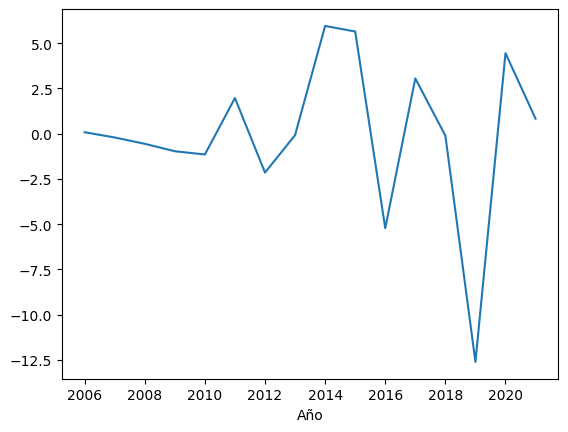

In [ ]:
stationary.plot()
#plt.show()
# save
stationary.to_csv('stationary.csv', header=False)

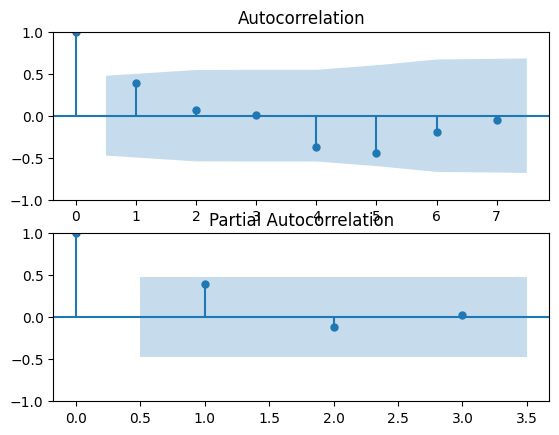

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(df_result, lags=7, ax=plt.gca())
plt.subplot(212)
plot_pacf(df_result, lags=3, ax=plt.gca())
plt.show()




1.   ACF: El punto que se encuentra fuera de las bandas de confianza (zona azul) indican correlaciones significativas. Estos puntos sugieren que hay patrones en los datos que se repiten en ciertos retardos este sera el valor q.
2.   PACF:  El punto que se encuentra fuera de las bandas de confianza indican correlaciones significativas después de eliminar las correlaciones en los retardos intermedios, este sera el valor p.





## Division del dataset, conjunto de entrenamiento y prueba.

In [ ]:
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

## Implementación manual

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predicción
  model = ARIMA(history, order=(1,1,1))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observación
  obs = test[i]
  history.append(obs)
  print('>Predicción=%.3f, Esperado=%.3f' % (yhat, obs))
# desempeño
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


>Predicción=14.945, Esperado=13.550
>Predicción=13.663, Esperado=19.505
>Predicción=20.470, Esperado=25.150
>Predicción=26.992, Esperado=19.926
>Predicción=18.988, Esperado=22.980
>Predicción=22.385, Esperado=22.870
>Predicción=22.636, Esperado=10.257
>Predicción=9.306, Esperado=14.707
>Predicción=16.495, Esperado=15.535
RMSE: 5.844


## Implementación directa con sckitLearn

In [ ]:
# Evaluación del modelo
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# Carda de datos
series =df_result
# Preparación de datos
X = series.values
X = X.astype('float64')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# Validación
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# Predicción
  yhat = history[-1]
  predictions.append(yhat)
# Observación
  obs = test[i]
  history.append(obs)
  print('>Predicción=%.3f, Esperado=%.3f' % (yhat, obs))
# desempeño
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


>Predicción=11.710, Esperado=11.410
>Predicción=11.410, Esperado=16.400
>Predicción=16.400, Esperado=21.000
>Predicción=21.000, Esperado=16.987
>Predicción=16.987, Esperado=19.520
>Predicción=19.520, Esperado=19.470
>Predicción=19.470, Esperado=9.897
>Predicción=9.897, Esperado=14.515
>Predicción=14.515, Esperado=15.189
RMSE: 4.498


## 4 Interpretación del Error cuadrático medio (RMSE) <a name="id4">

* Esta medida que nos dice cuán cerca están las predicciones de un modelo estadístico de los valores reales.
* Se utiliza para evaluar cuán bien un modelo se ajusta a los datos.
* Cuanto más bajo sea el RMSE, mejor será la precisión del modelo en la predicción de valores futuros.
* Se mide en las mismas unidades que los datos originales.
* Un RMSE de 20.667 ó 25.151 indica el error medío en metro cúbicos de agua.
* Es un RMSE aceptable teniendo en cuenta que el consumo promedio por año esta en termino de millones.

* El análisis de los errores cuadráticos medios (RMSE) revela la capacidad predictiva de un modelo ARIMA en la estimación del consumo de agua por estrato en Bogotá. Los resultados destacan una consistente precisión en las predicciones, siendo el RMSE más bajo para el estrato 4 (2.715 metros cúbicos) y el más alto para el estrato 6 (5.844 metros cúbicos). Esta variación subraya la eficacia del modelo en estratos específicos y proporciona información crucial para la gestión del consumo de agua en la ciudad.

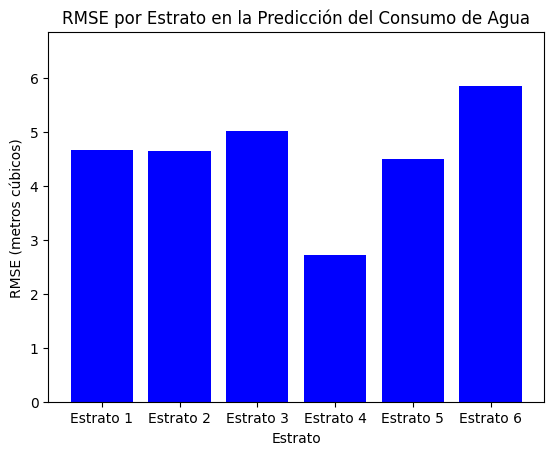

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de RMSE por estrato
estratos = ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']
rmse_values = [4.655, 4.639, 5.013, 2.715, 4.498, 5.844]

# Gráfico de barras
plt.bar(estratos, rmse_values, color='blue')
plt.xlabel('Estrato')
plt.ylabel('RMSE (metros cúbicos)')
plt.title('RMSE por Estrato en la Predicción del Consumo de Agua')
plt.ylim(0, max(rmse_values) + 1)  # Ajustar el rango del eje y
plt.show()

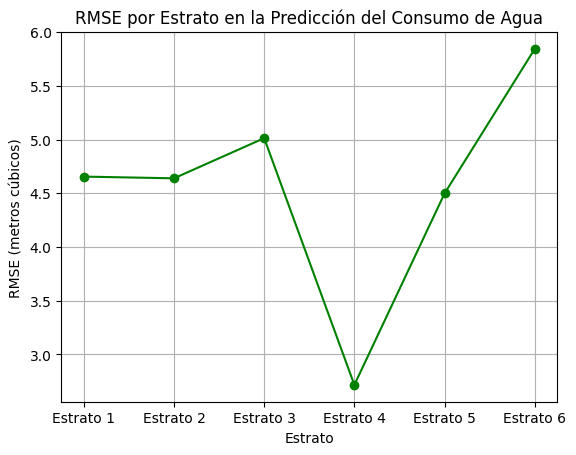

In [ ]:
# Gráfico de líneas
plt.plot(estratos, rmse_values, marker='o', color='green', linestyle='-')
plt.xlabel('Estrato')
plt.ylabel('RMSE (metros cúbicos)')
plt.title('RMSE por Estrato en la Predicción del Consumo de Agua')
plt.grid(True)
plt.show()

## 5 Conclusiones <a name="id5">

En conclusión, el modelo ARIMA demuestra una notable precisión en la predicción del consumo de agua, siendo más destacada para el estrato 4 con un RMSE de 2.715 metros cúbicos. Este resultado resalta la eficacia del modelo en estratos específicos y sugiere que, para una gestión más efectiva del recurso hídrico en Bogotá, se puede considerar una atención especial a las particularidades de cada estrato, con énfasis en la precisión ya establecida en el estrato 4.

## 6 Hasta aquí llegamos <a name="id6">

* El proyecto de predicción de consumo de agua ha alcanzado su punto actual debido a diversos desafíos, entre ellos la obtención de datos válidos y fiables. La necesidad de asegurar la calidad y confiabilidad de los datos ha sido un proceso que ha consumido más tiempo del inicialmente estimado. Además, la tarea de asimilar el conocimiento relacionado con la optimización de hiperparámetros en el modelo ha demostrado ser más compleja de lo anticipado.

* Estos factores, relacionados con la obtención de datos y la optimización del modelo, han llevado a que el proyecto alcance su estado actual, con la entrega formal pospuesta. A pesar de estos desafíos, el enfoque en la calidad de los datos y la comprensión profunda de los hiperparámetros son aspectos esenciales para asegurar la robustez y precisión del modelo de predicción de consumo de agua.